In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')
from scipy import linalg

In [2]:
clean = pd.read_csv('survey_32_clean.csv')

In [18]:
clean_N = [i for i in (clean['long'][clean['racial_group'] == 'black']).to_list() if type(i) != float]
clean_W = [i for i in (clean['long'][clean['racial_group'] == 'white']).to_list() if type(i) != float]
print(len(clean_N))
print(len(clean_W))

3448
1956


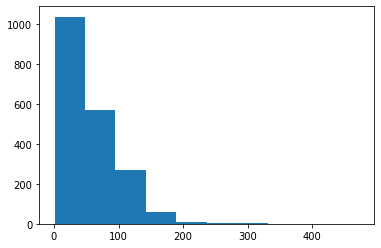

In [20]:
plt.hist([len(i.split(' ')) for i in clean_W]);

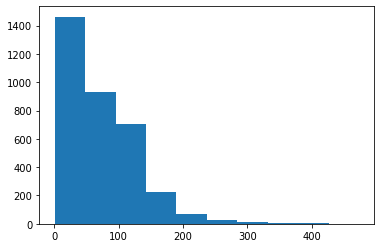

In [19]:
plt.hist([len(i.split(' ')) for i in clean_N]);

In [21]:
def DEIM(M): # row/column selection
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,768):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p

## Embedding the responses

In [23]:
embed_N = model.encode(clean_N)
embed_W = model.encode(clean_W)

In [6]:
def split_responses(responses):
    all_sentences = []
    response_numbers = []
    idx = 0
    for i in responses:
        temp = i.split('.')
        for k in temp:
            response_numbers.append(idx)
        for j in temp:
            all_sentences.append(j)
        idx += 1
    return all_sentences, response_numbers

In [76]:
embed_split_N = model.encode(split_responses(clean_N)[0])
embed_split_W = model.encode(split_responses(clean_W)[0])

## Applying DEIM

In [77]:
U, S, Vt = linalg.svd(embed_split_N)
U2, S2, Vt2 = linalg.svd(embed_split_W)

In [78]:
ranking_white = DEIM(U2)
ranking_black = DEIM(U)

# Taking a break for 64

In [2]:
from itertools import groupby

In [3]:
survey_64 = pd.read_csv('survey_64.csv')

In [4]:
no_nan = [i for i in survey_64['T7'] if i != np.nan]
no_f = [i for i in no_nan if type(i) != float]

In [9]:
sentences, response_number = split_responses(no_f)

In [10]:
len(sentences)

4478

In [11]:
len(response_number)

4478

In [12]:
freqs = [len(list(group)) for key, group in groupby(response_number)]

In [86]:
embed_64 = model.encode(sentences)

In [87]:
U_64, S_64, Vt_64 = linalg.svd(embed_64)

In [88]:
ranks_64 = DEIM(U_64)

In [7]:
def get_index(rankings, responses):
    response_idx = []
    count = 0
    for i in rankings:
        temp = responses[i]
        if temp not in response_idx:
            response_idx.append(temp)
    return response_idx

In [112]:
response_number

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 17,
 17,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 23,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 30,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 37,
 37,
 37,
 38,
 38,
 38,
 39,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 42,
 42,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 44,
 44,
 44,
 45,
 45,
 45,
 45,
 46,
 46,
 46,
 46,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 49,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 53,
 53,
 54,
 54,
 54,
 54,
 55,
 55,
 55,
 5

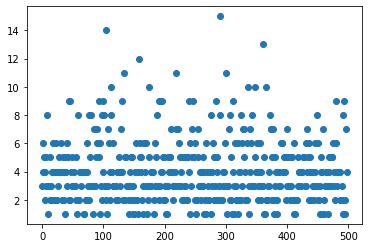

In [93]:
plt.plot([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)], 'o')

(array([130., 111., 155.,  40.,  20.,  30.,   5.,   4.,   1.,   2.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

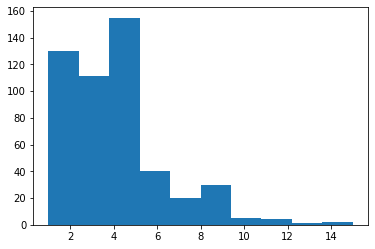

In [98]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)])

(0, 120)

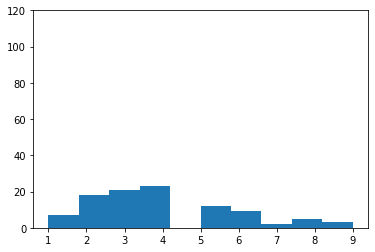

In [110]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)][:100])
plt.ylim(0, 120)

(array([105.,  90., 120.,  31.,  18.,  22.,   5.,   4.,   1.,   2.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

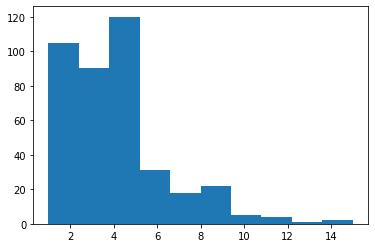

In [97]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)][100:])

In [101]:
len(get_index(ranks_64, response_number))

498

(array([286., 241., 343.,  92.,  67.,  59.,   8.,   9.,   2.,   2.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

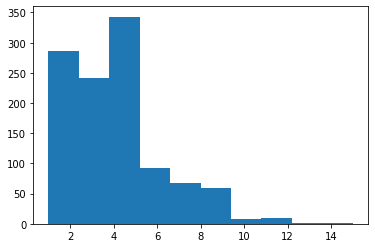

In [103]:
plt.hist([len(i.split('.')) for i in no_f])

In [13]:
full = model.encode(no_f)

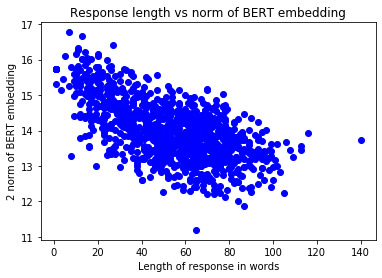

In [21]:
plt.plot([len(i.split(' ')) for i in no_f], [np.linalg.norm(i) for i in full], 'o', color = 'blue')
plt.title('Response length vs norm of BERT embedding')
plt.xlabel('Length of response in words')
plt.ylabel('2 norm of BERT embedding');